# ITMAL Exercise

## Intro


We startup by reusing parts of `01_the_machine_learning_landscape.ipynb` from Géron [GITHOML]. So we begin with what Géron says about life satisfactions vs GDP per capita.
 
Halfway down this notebook, a list of questions for ITMAL is presented.

## Chapter 1 – The Machine Learning landscape

_This is the code used to generate some of the figures in chapter 1._

### Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [2]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("IGNORING: Saving figure", fig_id) # ITMAL: I've disabled saving of figures
    #if tight_layout:
    #    plt.tight_layout()
    #plt.savefig(path, format='png', dpi=300)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

print("OK")

OK


### Code example 1-1

This function just merges the OECD's life satisfaction data and the IMF's GDP per capita data. It's a bit too long and boring and it's not specific to Machine Learning, which is why I left it out of the book.

In [3]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

print("OK")

OK


The code in the book expects the data files to be located in the current directory. I just tweaked it here to fetch the files in datasets/lifesat.

In [4]:
import os
datapath = os.path.join(r"C:\Users\Morten From\PycharmProjects\ITMALProjects/datasets", "lifesat", "")

# NOTE: a ! prefix makes us able to run system commands..
! dir

print("\nOK")
print(datapath)

 Volume in drive C is Windows-SSD
 Volume Serial Number is 6CC5-B5EC

 Directory of C:\Users\Morten From\PycharmProjects\ITMALProjects

03/02/2021  11.54    <DIR>          .
03/02/2021  11.54    <DIR>          ..
02/02/2021  14.18    <DIR>          .idea
02/02/2021  12.35    <DIR>          .ipynb_checkpoints

OK
C:\Users\Morten From\PycharmProjects\ITMALProjects/datasets\lifesat\
02/02/2021  12.37    <DIR>          datasets
03/02/2021  11.54           318.996 intro.ipynb
02/02/2021  12.32               544 main.py
02/02/2021  12.35            10.502 modules_and_classes.ipynb
               3 File(s)        330.042 bytes
               5 Dir(s)  110.817.181.696 bytes free


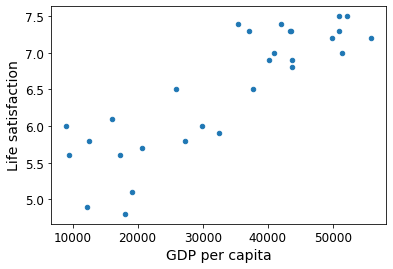

[[5.96242338]]
OK


In [5]:
# Code example
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

# Load the data
try:
    oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
    gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")
except Exception as e:
    print(f"ITMAL NOTE: well, you need to have the 'datasets' dir in path, please unzip 'datasets.zip' and make sure that its included in the datapath='{datapath}' setting in the cell above..")
    raise e
    
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

print("OK")

## ITMAL

Now we plot the linear regression result.

Just ignore all the data plotter code mumbo-jumbo here (code take dirclty from the notebook, [GITHOML])...and see the final plot.

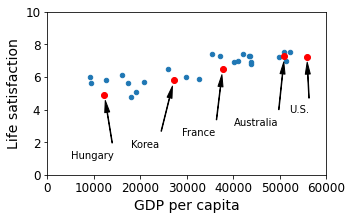

[[4.91154459e-05]]
[4.8530528]


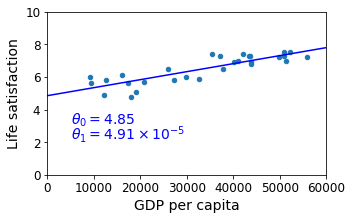

OK


In [11]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
#oecd_bli.head(2)

gdp_per_capita = pd.read_csv(datapath+"gdp_per_capita.csv", thousands=',', delimiter='\t',
                             encoding='latin1', na_values="n/a")
gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
gdp_per_capita.set_index("Country", inplace=True)
#gdp_per_capita.head(2)

full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
#full_country_stats

remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

sample_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]
#missing_data = full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[remove_indices]

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
position_text = {
    "Hungary": (5000, 1),
    "Korea": (18000, 1.7),
    "France": (29000, 2.4),
    "Australia": (40000, 3.0),
    "United States": (52000, 3.8),
}
for country, pos_text in position_text.items():
    pos_data_x, pos_data_y = sample_data.loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y), xytext=pos_text,
            arrowprops=dict(facecolor='black', width=0.5, shrink=0.1, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")
#save_fig('money_happy_scatterplot')
plt.show()

from sklearn import linear_model
lin1 = linear_model.LinearRegression()
Xsample = np.c_[sample_data["GDP per capita"]]
ysample = np.c_[sample_data["Life satisfaction"]]
lin1.fit(Xsample, ysample)
test12 = lin1.coef_
print(test12)
test13 = lin1.intercept_
print(test13)
t0 = 4.8530528
t1 = 4.91154459e-05

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
M=np.linspace(0, 60000, 1000)
plt.plot(M, t0 + t1*M, "b")
plt.text(5000, 3.1, r"$\theta_0 = 4.85$", fontsize=14, color="b")
plt.text(5000, 2.2, r"$\theta_1 = 4.91 \times 10^{-5}$", fontsize=14, color="b")
#save_fig('best_fit_model_plot')
plt.show()

print("OK")

## Ultra-brief Intro to the Fit-Predict Interface in Scikit-learn

OK, the important lines in the cells above are really just
```python
#Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
y_pred = model.predict(X_new)
print(y_pred) # outputs [[ 5.96242338]]

```

What happens here is that we create  model, called LinearRegression (for now just a 100% black-box method), put in our data training $\mathbf{X}$ matrix and corresponding desired training ground thruth vector $\mathbf{y}$ (aka $\mathbf{y}_{true})$, and then train the model. 

After training we extract a _predicted_ $\mathbf{y}_{pred}$ vector from the model, for some input scalar $x$=22587. 


### Supervised Training via Fit-predict

The train-predict (or train-fit) process on some data can be visualized as

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-94506/Fildeling/L01/Figs/supervised_learning.png" alt="WARNING: you need to be logged into Blackboard to view images" style="height:250px">

In this figure the untrained model is a `sklearn.linear_model.LinearRegression` python object. When trained via  `model.fit()`, using some know answers for the data, $\mathbf{y}_{true}~$, it becomes a blue-boxed trained model.

The trained model can be used to _predict_ values from new, yet-unseen, data, via the `model.predict()` function. 

In other words, how high is life-satisfaction for Cyprus' GDP=22587 USD?

Just call `model.predict()` on a matrix with one single numerical element, 22587, well, not a matrix really, but a python list-of-lists, `[[22587]]`  

```y_pred = model.predict([[22587]])```

Apparently 5.96 the models answers!

(you get used to the python built-in containers and numpy on the way..)

### Qa) The $\theta$ parameters and the $R^2$ Score

Géron uses some $\theta$ parameter from this linear regression model, in his examples and plots above.

How do you extract the $\theta_0$ and $\theta_1$ coefficients in his life-satisfaction figure form the linear regression model, via the models python attributes?

Read the documentation for the linear regressor at

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Extract the score=0.734 for the model using data (X,y) and explain what $R^2$ score measures in broad terms

$$
\begin{array}{rcll}
    R^2 &=& 1 - u/v\\
    u   &=& \sum (y_{true} - y_{pred}~)^2   ~~~&\small \mbox{residual sum of squares}\\
    v   &=& \sum (y_{true} - \mu_{true}~)^2 ~~~&\small \mbox{total sum of squares}
\end{array}
$$

with $y_{true}~$ being the true data, $y_{pred}~$ being the predicted data from the model and $\mu_{true}~$ being the true mean of the data.

What are the minimum and maximum values for $R^2~$?

Is it best to have a low $R^2$ score or a high $R^2$ score? This means, is $R^2$ a loss/cost function or a function that measures of fitness/goodness? 

NOTE$_1$: the $R^2$ is just one of many scoring functions used in ML, we will see plenty more other methods later.

NOTE$_2$: there are different definitions of the $R^2$, 'coefficient of determination', in linear algebra. We stricly use the formulation above. 

OPTIONAL: Read the additional in-depth literature on $R^2~$:

> https://en.wikipedia.org/wiki/Coefficient_of_determination

In [7]:
# TODO: add your code here..

print("The R2 value is found by using the score method on the fitted linear regression model lin1")
R2value = lin1.score(Xsample, ysample)
print(R2value)

y_pred = lin1.predict(Xsample)
u = ((ysample - y_pred) ** 2).sum()
v = ((ysample - ysample.mean()) ** 2).sum()
print("u variable is(Residual sum of squares): ")
print(u)
print("\nv variable is(Total sum of squares): ")
print(v)

The R2 value is found by using the score method on the fitted linear regression model lin1
0.7344414355437029
u variable is(Residual sum of squares): 
5.241759774692194

v variable is(Total sum of squares): 
19.73862068965518


# The Merits of the Fit-Predict Interface

Now comes the really fun part: all methods in Scikit-learn have this fit-predict interface, and you can easily interchange models in your code just by instantiating a new and perhaps better ML model.

There are still a lot of per-model parameters to tune, but fortunately, the built-in default values provide you with a good initial guess for good model setup.

Later on, you might want to go into the parameter detail trying to optimize some params (opening the lid of the black-box ML algo), but for now, we pretty much stick to the default values.

Let's try to replace the linear regression now, let's test a _k-nearest neighbour algorithm_ instead (still black boxed algorithm-wise)...


### Qb) Using k-Nearest Neighbors

Change the linear regression model to a `sklearn.neighbors.KNeighborsRegressor` with k=3 (as in [HOML:p21,bottom]), and rerun the `fit` and `predict` using this new model.

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

What _score-method_ does the k-nearest model use, and is it comparable to the linear regression model? 

Seek out the documentation in Scikit-learn, if the scoring methods are not equal, can they be compared to each other at all then?

Remember to put pointer/text from the Sckikit-learn documentation in the journal...(did you find the right kNN model etc.)

In [7]:
# this is our raw data set:
sample_data

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


In [8]:
# and this is our preprocessed data
country_stats

,GDP per capita,Life satisfaction
Country,,
Russia,9054.914,6.0
Turkey,9437.372,5.6
Hungary,12239.894,4.9
Poland,12495.334,5.8
Slovak Republic,15991.736,6.1
Estonia,17288.083,5.6
Greece,18064.288,4.8
Portugal,19121.592,5.1
Slovenia,20732.482,5.7


X.shape= (29, 1)
y.shape= (29, 1)


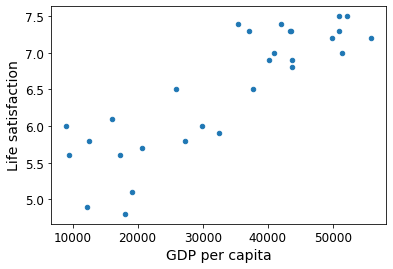

What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?

It yields :
[[5.76666667]]

What score-method does the k-nearest model use, and is it comparable to the linear regression model?

It uses the R2 value as well, and the values are therefore comparable
0.8525732853499179


In [12]:
# Prepare the data
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

print("X.shape=",X.shape)
print("y.shape=",y.shape)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

# Select and train a model

# TODO: add your code here..
from sklearn.neighbors import KNeighborsRegressor
n_neighbours = 3DD
knnClassifier = KNeighborsRegressor(n_neighbours)
knnClassifier.fit(X, y)
cyprus = np.array([22587]).reshape(-1,1)
print("What do the k-nearest neighbours estimate for Cyprus, compared to the linear regression (it should yield=5.77)?")
cPrediction = knnClassifier.predict(cyprus)
print("\nIt yields :")
print(cPrediction)


print("\nWhat score-method does the k-nearest model use, and is it comparable to the linear regression model?")
print("\nIt uses the R2 value as well, and the values are therefore comparable")
score = knnClassifier.score(X,y)
print(score)

### Qc) Tuning Parameter for k-Nearest Neighbors and A Sanity Check

But that not the full story. Try plotting the prediction for both models in the same graph and tune the `k_neighbor` parameter of the `KNeighborsRegressor` model.  

Choosing `k_neighbor=1` produces a nice `score=1`, that seems optimal...but is it really so good?

Plotting the two models in a 'Life Satisfaction-vs-GDP capita' 2D plot by creating an array in the range 0 to 60000 (USD) (the `M` matrix below) and then predict the corresponding y value will sheed some light to this. 

Now reusing the plots stubs below, try to explain why the k-nearest neighbour with `k_neighbor=1` has such a good score.

Does a score=1 with `k_neighbor=1`also mean that this would be the prefered estimator for the job?

Hint here is a similar plot of a KNN for a small set of different k's:

<img src="https://blackboard.au.dk/bbcswebdav/courses/BB-Cou-UUVA-91831/Fildeling/L01/Figs/regression_with_knn.png"  alt="WARNING: you need to be logged into Blackboard to view images" style="height:150px">

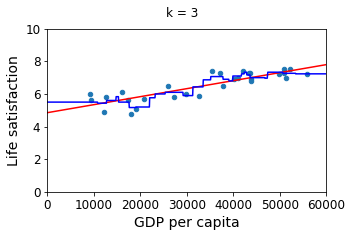

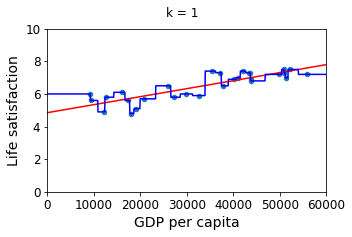

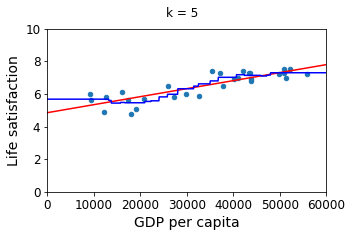

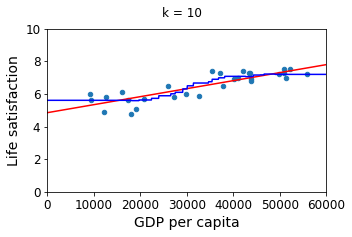

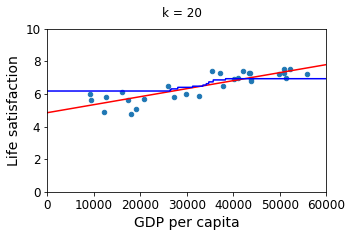

In [13]:
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('k = 3')
# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

# from this test M data, predict the y values via the lin.reg. and k-nearest models
y_pred_lin = model.predict(M)
y_pred_knn = knnClassifier.predict(M)   # ASSUMING the variable name 'knn' of your KNeighborsRegressor 

# use plt.plot to plot x-y into the sample_data plot..
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")

# TODO: add your code here..
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('k = 1')

# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

n_neighbours = 1
knnClassifier1 = KNeighborsRegressor(n_neighbours)
knnClassifier1.fit(X,y)
y_pred_knn1 = knnClassifier1.predict(M)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn1, "b")

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('k = 5')
# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

n_neighbours = 5
knnClassifier5 = KNeighborsRegressor(n_neighbours)
knnClassifier5.fit(X,y)
y_pred_knn5 = knnClassifier5.predict(M)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn5, "b")

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('k = 10')
# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

n_neighbours = 10
knnClassifier10 = KNeighborsRegressor(n_neighbours)
knnClassifier10.fit(X,y)
y_pred_knn10 = knnClassifier10.predict(M)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn10, "b")

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('k = 20')
# create an test matrix M, with the same dimensionality as X, and in the range [0;60000] 
# and a step size of your choice
m=np.linspace(0, 60000, 1000)
M=np.empty([m.shape[0],1])
M[:,0]=m

n_neighbours = 20
knnClassifier20 = KNeighborsRegressor(n_neighbours)
knnClassifier20.fit(X,y)
y_pred_knn20 = knnClassifier20.predict(M)
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn20, "b")

#assert False, "TODO: try knn with different k_neighbor params, that is re-instantiate knn, refit and replot.."

### Qd) Trying out a Neural Network

Let us then try a Neural Network on the data, using the fit-predict interface allows us to replug a new model into our existing code.

There are a number of different NN's available, let's just hook into Scikit-learns Multi-Layer Perceptron for regression, that is an 'MLPRegressor'. 

Now, the data-set for training the MLP is really not well scaled, so we need to tweak a lot of parameters in the MLP just to get it to produce some sensible output: with out preprocessing and scaling of the input data, `X`, the MLP is really a bad choice of model for the job since it so easily produces garbage output. 

Try training the `mlp` regression model below, predict the value for Cyprus, and find the `score` value for the training set...just as we did for the linear and KNN models.

Can the `MLPRegressor` score function be compared with the linear and KNN-scores?

Iteration 1, loss = 35547418.91667505
Iteration 2, loss = 34651745.78211664
Iteration 3, loss = 33767199.58763833
Iteration 4, loss = 32893988.55647277
Iteration 5, loss = 32032310.53311444
Iteration 6, loss = 31182351.78730841
Iteration 7, loss = 30344285.74408717
Iteration 8, loss = 29518271.64854574
Iteration 9, loss = 28704453.19502282
Iteration 10, loss = 27902957.18494498
Iteration 11, loss = 27113892.32779059
Iteration 12, loss = 26428877.62657395
Iteration 13, loss = 25809692.15679748
Iteration 14, loss = 25198354.64325685
Iteration 15, loss = 24594909.46468280
Iteration 16, loss = 23999406.92320017
Iteration 17, loss = 23411900.36758011
Iteration 18, loss = 22832444.13885223
Iteration 19, loss = 22261092.07191097
Iteration 20, loss = 21697896.38427451
Iteration 21, loss = 21142906.84172118
Iteration 22, loss = 20596170.12680414
Iteration 23, loss = 20057729.35933677
Iteration 24, loss = 19527623.73300279
Iteration 25, loss = 19005888.24229079
Iteration 26, loss = 18492553.4807

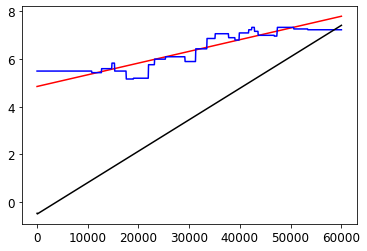

In [17]:
from sklearn.neural_network import MLPRegressor

# Setup MLPRegressor, can be very tricky for the tiny-data
mlp = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp.fit(X,y.ravel())

# lets make a MLP regressor prediction and redo the plots
y_pred_mlp = mlp.predict(M) 
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
plt.plot(m, y_pred_mlp, "k")

# TODO: add your code here..
valueOfCyprus = mlp.predict(cyprus)
print("The value of Cyprus is predicted to be: ")
print(valueOfCyprus)
scoreMLP = mlp.score(X,y)
print("The score of the model, it gives R2 score, which therefore means they can be compared, is: ")
print(scoreMLP)

#Assert False, "TODO: predict value for Cyprus and fetch the score() from the fitting."

### Qe) Neural Network with pre-scaling

Now, the neurons in neural networks normally expects input data in the range `[0;1]` or sometimes in the range `[-1;1]`, meaning that for value outside this range the you put of the neuron will saturate to it's min or max value (also typical `0` or `1`). 

A concrete value of `X` is, say 22.000 USD, that is far away from what the MLP expects. To af fix to the problem in Qd) is to preprocess data by scaling it down to something more sensible.

Try to scale X to a range of `[0;1]`, re-train the MLP, re-plot and find the new score from the rescaled input. Any better?

[[0.        ]
 [0.00818087]
 [0.06812749]
 [0.07359142]
 [0.1483803 ]
 [0.17610947]
 [0.19271269]
 [0.21532867]
 [0.249786  ]
 [0.35956583]
 [0.38802504]
 [0.44516659]
 [0.50118686]
 [0.5623157 ]
 [0.59871237]
 [0.61219068]
 [0.66420375]
 [0.68323848]
 [0.70414695]
 [0.73319432]
 [0.73899437]
 [0.74158079]
 [0.74257879]
 [0.87296468]
 [0.89410502]
 [0.89639981]
 [0.90471802]
 [0.92104778]
 [1.        ]]
Iteration 1, loss = 22.57834348
Iteration 2, loss = 22.51032963
Iteration 3, loss = 22.44246742
Iteration 4, loss = 22.37475918
Iteration 5, loss = 22.30720720
Iteration 6, loss = 22.23981372
Iteration 7, loss = 22.17258089
Iteration 8, loss = 22.10551080
Iteration 9, loss = 22.03860546
Iteration 10, loss = 21.97186681
Iteration 11, loss = 21.90529668
Iteration 12, loss = 21.83889683
Iteration 13, loss = 21.77266892
Iteration 14, loss = 21.70661453
Iteration 15, loss = 21.64073513
Iteration 16, loss = 21.57503210
Iteration 17, loss = 21.50950671
Iteration 18, loss = 21.44416014
Iteratio

Iteration 420, loss = 3.01183119
Iteration 421, loss = 2.98891015
Iteration 422, loss = 2.96611217
Iteration 423, loss = 2.94343704
Iteration 424, loss = 2.92088456
Iteration 425, loss = 2.89845453
Iteration 426, loss = 2.87614674
Iteration 427, loss = 2.85396099
Iteration 428, loss = 2.83189708
Iteration 429, loss = 2.80995482
Iteration 430, loss = 2.78813401
Iteration 431, loss = 2.76643444
Iteration 432, loss = 2.74485593
Iteration 433, loss = 2.72339827
Iteration 434, loss = 2.70206126
Iteration 435, loss = 2.68084469
Iteration 436, loss = 2.65974837
Iteration 437, loss = 2.63877209
Iteration 438, loss = 2.61791564
Iteration 439, loss = 2.59717882
Iteration 440, loss = 2.57656140
Iteration 441, loss = 2.55606318
Iteration 442, loss = 2.53568395
Iteration 443, loss = 2.51542347
Iteration 444, loss = 2.49528154
Iteration 445, loss = 2.47526563
Iteration 446, loss = 2.45537151
Iteration 447, loss = 2.43559593
Iteration 448, loss = 2.41593856
Iteration 449, loss = 2.39639909
Iteration 

Iteration 864, loss = 0.11516756
Iteration 865, loss = 0.11502170
Iteration 866, loss = 0.11487817
Iteration 867, loss = 0.11473695
Iteration 868, loss = 0.11459799
Iteration 869, loss = 0.11446125
Iteration 870, loss = 0.11432668
Iteration 871, loss = 0.11419427
Iteration 872, loss = 0.11406395
Iteration 873, loss = 0.11393571
Iteration 874, loss = 0.11380950
Iteration 875, loss = 0.11368528
Iteration 876, loss = 0.11356302
Iteration 877, loss = 0.11344269
Iteration 878, loss = 0.11332425
Iteration 879, loss = 0.11320767
Iteration 880, loss = 0.11309292
Iteration 881, loss = 0.11297995
Iteration 882, loss = 0.11286875
Iteration 883, loss = 0.11275927
Iteration 884, loss = 0.11265150
Iteration 885, loss = 0.11254539
Iteration 886, loss = 0.11244091
Iteration 887, loss = 0.11233805
Iteration 888, loss = 0.11223676
Iteration 889, loss = 0.11213702
Iteration 890, loss = 0.11203880
Iteration 891, loss = 0.11194228
Iteration 892, loss = 0.11184728
Iteration 893, loss = 0.11175374
Iteration 

Iteration 1289, loss = 0.10023076
Iteration 1290, loss = 0.10021247
Iteration 1291, loss = 0.10019420
Iteration 1292, loss = 0.10017596
Iteration 1293, loss = 0.10015774
Iteration 1294, loss = 0.10013954
Iteration 1295, loss = 0.10012136
Iteration 1296, loss = 0.10010320
Iteration 1297, loss = 0.10008506
Iteration 1298, loss = 0.10006694
Iteration 1299, loss = 0.10004884
Iteration 1300, loss = 0.10003076
Iteration 1301, loss = 0.10001270
Iteration 1302, loss = 0.09999465
Iteration 1303, loss = 0.09997662
Iteration 1304, loss = 0.09995861
Iteration 1305, loss = 0.09994062
Iteration 1306, loss = 0.09992264
Iteration 1307, loss = 0.09990468
Iteration 1308, loss = 0.09988674
Iteration 1309, loss = 0.09986881
Iteration 1310, loss = 0.09985090
Iteration 1311, loss = 0.09983301
Iteration 1312, loss = 0.09981513
Iteration 1313, loss = 0.09979727
Iteration 1314, loss = 0.09977942
Iteration 1315, loss = 0.09976159
Iteration 1316, loss = 0.09974378
Iteration 1317, loss = 0.09972598
Iteration 1318

Iteration 1716, loss = 0.09401915
Iteration 1717, loss = 0.09400855
Iteration 1718, loss = 0.09399798
Iteration 1719, loss = 0.09398742
Iteration 1720, loss = 0.09397688
Iteration 1721, loss = 0.09396635
Iteration 1722, loss = 0.09395585
Iteration 1723, loss = 0.09394536
Iteration 1724, loss = 0.09393489
Iteration 1725, loss = 0.09392443
Iteration 1726, loss = 0.09391400
Iteration 1727, loss = 0.09390358
Iteration 1728, loss = 0.09389318
Iteration 1729, loss = 0.09388279
Iteration 1730, loss = 0.09387242
Iteration 1731, loss = 0.09386207
Iteration 1732, loss = 0.09385174
Iteration 1733, loss = 0.09384143
Iteration 1734, loss = 0.09383113
Iteration 1735, loss = 0.09382085
Iteration 1736, loss = 0.09381059
Iteration 1737, loss = 0.09380034
Iteration 1738, loss = 0.09379011
Iteration 1739, loss = 0.09377990
Iteration 1740, loss = 0.09376971
Iteration 1741, loss = 0.09375953
Iteration 1742, loss = 0.09374937
Iteration 1743, loss = 0.09373923
Iteration 1744, loss = 0.09372910
Iteration 1745

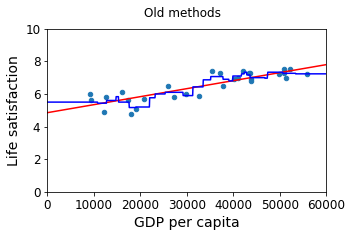

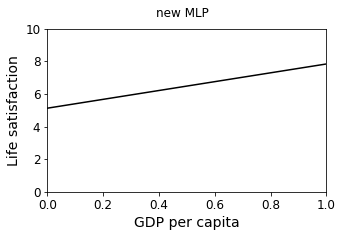

In [52]:
# TODO: add your code here..
#rescaling of X to be in [0;1]
maxValue = np.max(X)
minValue = np.min(X)

X_new = (X-minValue)/(maxValue-minValue)
print(X_new)

mlp2 = MLPRegressor( hidden_layer_sizes=(10,), solver='adam', activation='relu', tol=1E-5, max_iter=100000, verbose=True)
mlp2.fit(X_new,y.ravel())


M_new = (X-minValue)/(maxValue-minValue)
print(M_new)
y_pred_mlp2 = mlp2.predict(M) 
sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 60000, 0, 10])
plt.suptitle('Old methods')
plt.plot(m, y_pred_lin, "r")
plt.plot(m, y_pred_knn, "b")
#plt.plot(m, y_pred_mlp2, "k")

sample_data.plot(kind='scatter', x="GDP per capita", y='Life satisfaction', figsize=(5,3))
plt.axis([0, 1, 0, 10])
plt.suptitle('new MLP')
plt.plot(m, y_pred_mlp2, "k")
# TODO: add your code here..
cyprus_new = (cyprus-minValue)/(maxValue-minValue)
valueOfCyprus = mlp2.predict(cyprus_new)
print("The value of Cyprus is predicted to be: ")
print(valueOfCyprus)
scoreMLP = mlp2.score(X_new,y.ravel())
print("The score of the model, it gives R2 score, which therefore means they can be compared, is: ")
print(scoreMLP)
print("the new MLP with values of inputs scaled to be [0;1] has much better scores than the one before")

#assert False, "TODO: try prescale data for the MPL...any better?"

REVISIONS||
---------||
2018-1218|CEF, initial.                  
2019-0124|CEF, spell checked and update. 
2019-0130|CEF, removed reset -f, did not work on all PC's. 
2019-0820|CEF, E19 ITMAL update. 
2019-0826|CEF, minor mod to NN exercise.
2019-0828|CEF, fixed dataset dir issue, datapath"../datasets" changed to "./datasets".
2020-0125|CEF, F20 ITMAL update.
2020-0806|CEF, E20 ITMAL update, minor fix of ls to dir and added exception to datasets load, udpated figs paths.
2020-0924|CEF, updated text to R2, Qa exe.
2020-0928|CEF, updated R2 and theta extraction, use python attributes, moved revision table. Added comment about MLP.
2021-0112|CEF, updated Qe.